In [1]:
import pandas as pd
dfrunning = pd.read_csv('bis_Juni_04_CLEAN.csv')
print(dfrunning.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Aktivitätstyp                  40 non-null     object 
 1   Datum                          40 non-null     object 
 2   Distanz                        40 non-null     float64
 3   Kalorien                       40 non-null     object 
 4   Zeit                           40 non-null     object 
 5   Ø Herzfrequenz                 40 non-null     int64  
 6   Maximale Herzfrequenz          40 non-null     int64  
 7   Aerober TE                     40 non-null     object 
 8   Ø Schrittfrequenz (Laufen)     40 non-null     int64  
 9   Max. Schrittfrequenz (Laufen)  40 non-null     int64  
 10  Ø Pace                         40 non-null     object 
 11  Beste Pace                     40 non-null     object 
 12  Anstieg gesamt                 40 non-null     int64

In [2]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(dfrunning)

   Aktivitätstyp                Datum  Distanz Kalorien        Zeit  \
0         Laufen  2023-06-03 16:43:04    10.01      651    00:48:45   
1         Laufen  2023-06-01 19:34:34     6.01      363    00:29:33   
2         Laufen  2023-05-30 17:00:27     8.01      475    00:39:21   
3         Laufen  2023-05-25 12:47:26     4.01      250    00:19:44   
4         Laufen  2023-05-22 13:28:41     1.01       60  00:04:44.3   
5         Laufen  2023-05-21 13:03:04    10.01      619    00:50:05   
6         Laufen  2023-05-19 18:13:19     8.02      503    00:39:04   
7         Laufen  2023-05-16 12:27:21     6.01      287    00:29:41   
8         Laufen  2023-05-13 14:42:40     1.01       55  00:04:44.7   
9         Laufen  2023-05-13 14:08:17     3.20      212    00:17:28   
10        Laufen  2023-04-19 11:50:15     5.01      276    00:24:09   
11        Laufen  2023-04-10 16:40:16    14.01      838    01:10:39   
12        Laufen  2023-04-01 19:18:48     7.01      471    00:35:33   
13    

In [3]:
# deleting everything with null values
# ------------------------------------
#dfrunning = dfrunning.drop(columns=['Aktivitätstyp', Favorit', 'Titel', 'Oberflächenpause', 'Tauchzeit', 'Dekompression','Ø Schlagrate', 'Wiederholungen insgesamt', 'Flow',
#                                    'Grit', 'Max. Leistung', 'Ø Swolf', 'Training Stress Score®', 'Ø Leistung',
#                                   'Ø vertikale Bewegung', 'Ø Bodenkontaktzeit', 'Durchschnittliches vertikales Verhältnis'])

print(dfrunning.info())

# saving
# ------
# dfrunning.to_csv('bis_Juni_04_CLEAN.csv', index=False) #(file_name, sep='\t', encoding='utf-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Aktivitätstyp                  40 non-null     object 
 1   Datum                          40 non-null     object 
 2   Distanz                        40 non-null     float64
 3   Kalorien                       40 non-null     object 
 4   Zeit                           40 non-null     object 
 5   Ø Herzfrequenz                 40 non-null     int64  
 6   Maximale Herzfrequenz          40 non-null     int64  
 7   Aerober TE                     40 non-null     object 
 8   Ø Schrittfrequenz (Laufen)     40 non-null     int64  
 9   Max. Schrittfrequenz (Laufen)  40 non-null     int64  
 10  Ø Pace                         40 non-null     object 
 11  Beste Pace                     40 non-null     object 
 12  Anstieg gesamt                 40 non-null     int64

In [4]:
print(dfrunning.Distanz)
print(dfrunning.Distanz.min(), '   ', dfrunning.Distanz.max())

0     10.01
1      6.01
2      8.01
3      4.01
4      1.01
5     10.01
6      8.02
7      6.01
8      1.01
9      3.20
10     5.01
11    14.01
12     7.01
13    10.01
14    10.07
15     8.04
16    14.01
17     8.01
18     8.01
19    10.00
20     4.06
21     3.01
22    16.01
23     7.01
24    16.01
25    10.03
26    12.01
27    15.53
28     8.01
29    13.01
30    17.01
31     6.44
32     8.12
33    14.33
34    25.02
35    12.03
36    12.01
37     6.01
38    21.01
39    10.01
Name: Distanz, dtype: float64
1.01     25.02


In [186]:
dfrunning = dfrunning.assign(Pace_in_seconds=0) # here is 'int' type

### with this function I convert everything in seconds ###

def time_convert(t):
    m,s = map(int, t.split(':'))
    return m*60+s

dfrunning.Pace_in_seconds = dfrunning['Ø Pace'].apply(time_convert)

print(dfrunning.Pace_in_seconds)

0     292
1     295
2     295
3     295
4     282
5     300
6     292
7     296
8     281
9     328
10    289
11    303
12    304
13    299
14    308
15    309
16    318
17    313
18    300
19    302
20    288
21    304
22    328
23    233
24    333
25    322
26    331
27    331
28    321
29    324
30    326
31    337
32    324
33    315
34    326
35    320
36    309
37    305
38    321
39    317
Name: Pace_in_seconds, dtype: int64


In [187]:
dfrunning.head()

,Aktivitätstyp,Datum,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,Aerober TE,Ø Schrittfrequenz (Laufen),Max. Schrittfrequenz (Laufen),...,Ø Schrittlänge,Minimale Temperatur,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Zeit in Bewegung,Verstrichene Zeit,Minimale Höhe,Maximale Höhe,Pace_in_seconds
0,Laufen,2023-06-03 16:43:04,10.01,651,00:48:45,166,179,4.6,177,191,...,1.16,23.0,00:02.51,11,29.0,00:48:43,00:48:45,49,60,292
1,Laufen,2023-06-01 19:34:34,6.01,363,00:29:33,152,160,3.4,178,194,...,1.14,20.0,00:02.40,7,24.0,00:29:33,00:29:40,12,29,295
2,Laufen,2023-05-30 17:00:27,8.01,475,00:39:21,155,160,3.8,178,199,...,1.14,22.0,00:02.15,9,25.0,00:39:20,00:39:21,11,22,295
3,Laufen,2023-05-25 12:47:26,4.01,250,00:19:44,163,176,3.3,178,211,...,1.14,21.0,00:03.35,5,26.0,00:19:43,00:19:44,7,13,295
4,Laufen,2023-05-22 13:28:41,1.01,60,00:04:44.3,164,176,2.0,180,200,...,1.18,22.0,00:02.81,2,24.0,00:04:43.5,00:04:44.3,4,7,282


In [52]:
import math
rango = float(dfrunning.Distanz.max()) - float(dfrunning.Distanz.min())
n = len(dfrunning)
k = 1 + 3.3 * math.log(n) # Sturges ... number of intervals #
a = rango / k # medida del intervalo #

print(f'number of records(rows): {n} \nrange: {rango:.2f} km (Min: {dfrunning.Distanz.min()}km / Max: {dfrunning.Distanz.max()}km) \ninterval: {a:.2f} km')

number of records(rows): 40 
range: 24.01 km (Min: 1.01km / Max: 25.02km) 
interval: 1.82 km


In [189]:
##### or #####

n = len(dfrunning)

a = 1 # each interval 1 km

max = math.floor(dfrunning.Distanz.max()) # 25 km
min = math.floor(dfrunning.Distanz.min()) # 1 km

dicc = {}
dicc = {a:0 for a in range(min-1, max + 1)} # 0-25 km

#print(dfrunning.Distanz)
               
for t in range(len(dfrunning)):
    a = math.floor(dfrunning.Distanz[t])
    dicc[a] = dicc[a] + 1

print()
print(dicc)

print('\nTable of frecuencies')
print('--------------------\n')
print('km | Fi |   %  |')
print('----------------')

Fa = Tkm = 0
for k in dicc.keys():
    if dicc[k] != 0:
        print(f'{k:2} | {dicc[k]:2} | {(dicc[k]*100/n):4} |')
    Tkm = Tkm + (k * dicc[k])
    Fa = Fa + dicc[k]

Ttkm = sum(dfrunning.Distanz)
print(f'\nTotal km.(redounded):{Tkm} but exactly:{Ttkm:.2f}km ')
import scipy.stats as sci
print(f'mean:{Ttkm/n:.2f} with pandas:{dfrunning["Distanz"].mean():.2f} Trim_mean:{sci.trim_mean(dfrunning["Distanz"], 0.1):.2f}')
print(f'median: {dfrunning["Distanz"].median():.2f} km')

# Weighted Mean
import numpy as np
#wg = np.average(dfrunning['Ø Schrittlänge'], weights=dfrunning['Distanz'])
#wg = np.average(dfrunning['Pace_in_seconds']/60, weights=dfrunning['Distanz'])
print(f'\nWeighted Mean:{wg:.2f}')
# Weighted Median (donwload package "wquantiles")
#wquantiles.median(dfrunning['Anzahl der Runden'], weights=dfrunning['Distanz'])

print()
print()

dfrunning.info()
dfrunning.describe()


{0: 0, 1: 2, 2: 0, 3: 2, 4: 2, 5: 1, 6: 4, 7: 2, 8: 7, 9: 0, 10: 7, 11: 0, 12: 3, 13: 1, 14: 3, 15: 1, 16: 2, 17: 1, 18: 0, 19: 0, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 1}

Table of frecuencies
--------------------

km | Fi |   %  |
----------------
 1 |  2 |  5.0 |
 3 |  2 |  5.0 |
 4 |  2 |  5.0 |
 5 |  1 |  2.5 |
 6 |  4 | 10.0 |
 7 |  2 |  5.0 |
 8 |  7 | 17.5 |
10 |  7 | 17.5 |
12 |  3 |  7.5 |
13 |  1 |  2.5 |
14 |  3 |  7.5 |
15 |  1 |  2.5 |
16 |  2 |  5.0 |
17 |  1 |  2.5 |
21 |  1 |  2.5 |
25 |  1 |  2.5 |

Total km.(redounded):386 but exactly:388.16km 
mean:9.70 with pandas:9.70 Trim_mean:9.40
median: 9.06 km

Weighted Mean:5.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Aktivitätstyp                  40 non-null     object 
 1   Datum                          40 non-null     object 
 2   

,Distanz,Ø Herzfrequenz,Maximale Herzfrequenz,Ø Schrittfrequenz (Laufen),Max. Schrittfrequenz (Laufen),Anstieg gesamt,Ø Schrittlänge,Minimale Temperatur,Anzahl der Runden,Maximale Temperatur,Minimale Höhe,Pace_in_seconds
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,9.704000,149.150000,160.975000,175.750000,192.725000,24.95000,1.113000,17.600000,10.650000,21.700000,24.075000,307.900000
std,5.128374,51.043747,54.929553,2.393903,6.156037,32.81256,0.071439,5.443415,5.121849,4.926121,56.275598,19.403674
min,1.010000,0.000000,0.000000,170.000000,181.000000,1.00000,1.030000,6.000000,2.000000,13.000000,-150.000000,233.000000
25%,6.332500,158.000000,171.750000,173.750000,189.000000,7.75000,1.070000,13.750000,7.000000,17.750000,3.000000,295.750000
50%,9.060000,164.000000,178.500000,176.000000,192.000000,13.50000,1.110000,17.500000,10.000000,22.000000,26.000000,308.500000
75%,12.275000,170.250000,184.000000,177.000000,195.500000,24.00000,1.140000,21.250000,13.250000,25.000000,58.250000,322.500000
max,25.020000,181.000000,195.000000,181.000000,211.000000,144.00000,1.470000,28.000000,26.000000,32.000000,100.000000,337.000000


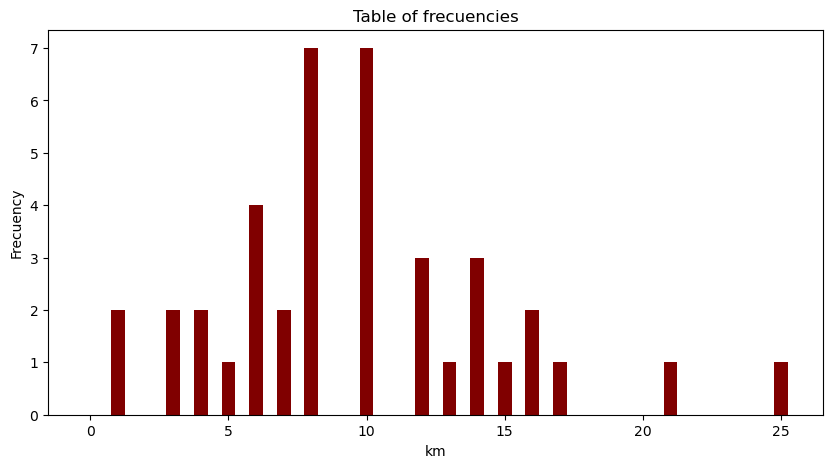

In [110]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dicc.keys(), dicc.values(), color ='maroon', width = 0.5)
 
plt.xlabel("km")
plt.ylabel("Frecuency")
plt.title("Table of frecuencies")
plt.show()

In [205]:
dfrunning

,Aktivitätstyp,Datum,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,Aerober TE,Ø Schrittfrequenz (Laufen),Max. Schrittfrequenz (Laufen),...,Ø Schrittlänge,Minimale Temperatur,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Zeit in Bewegung,Verstrichene Zeit,Minimale Höhe,Maximale Höhe,Pace_in_seconds
0,Laufen,2023-06-03 16:43:04,10.01,651,00:48:45,166,179,4.6,177,191,...,1.16,23.0,00:02.51,11,29.0,00:48:43,00:48:45,49,60,292
1,Laufen,2023-06-01 19:34:34,6.01,363,00:29:33,152,160,3.4,178,194,...,1.14,20.0,00:02.40,7,24.0,00:29:33,00:29:40,12,29,295
2,Laufen,2023-05-30 17:00:27,8.01,475,00:39:21,155,160,3.8,178,199,...,1.14,22.0,00:02.15,9,25.0,00:39:20,00:39:21,11,22,295
3,Laufen,2023-05-25 12:47:26,4.01,250,00:19:44,163,176,3.3,178,211,...,1.14,21.0,00:03.35,5,26.0,00:19:43,00:19:44,7,13,295
4,Laufen,2023-05-22 13:28:41,1.01,60,00:04:44.3,164,176,2.0,180,200,...,1.18,22.0,00:02.81,2,24.0,00:04:43.5,00:04:44.3,4,7,282
5,Laufen,2023-05-21 13:03:04,10.01,619,00:50:05,162,167,4.6,177,191,...,1.13,26.0,00:03.16,11,28.0,00:50:02,00:51:39,7,15,300
6,Laufen,2023-05-19 18:13:19,8.02,503,00:39:04,171,182,4.7,177,194,...,1.16,23.0,00:12.79,9,26.0,00:39:02,00:39:04,-4,5,292
7,Laufen,2023-05-16 12:27:21,6.01,287,00:29:41,139,176,3.0,177,192,...,1.14,18.0,00:03.16,7,23.0,00:29:39,00:29:41,-5,11,296
8,Laufen,2023-05-13 14:42:40,1.01,55,00:04:44.7,159,171,2.0,178,192,...,1.20,20.0,00:02.32,2,22.0,00:04:44.3,00:04:44.7,-8,-4,281
9,Laufen,2023-05-13 14:08:17,3.20,212,00:17:28,162,176,3.0,170,182,...,1.08,19.0,01:13.22,4,20.0,00:17:27,00:17:28,-11,43,328


In [208]:
print(f'Standard Deviation Distanz: {dfrunning.Distanz.std()}')
print(f"Standard Deviation Ø Herzfrequenz: {dfrunning['Ø Herzfrequenz'].std()} ...muchos tienen 0 !!!")
print(f'Standard Deviation Pace in seconds: {dfrunning.Pace_in_seconds.std()}')

# delete "," from Kalorien
#print(f'Standard Deviation Kalorien: {dfrunning.Kalorien.std()}')


print()
#print(dfrunning.std())

print(f'Coeficiente de variación Distanz: {dfrunning.Distanz.std() / dfrunning.Distanz.mean() }')
print(f'Coeficiente de variación Ø Herzfrequenz: {dfrunning["Ø Herzfrequenz"].std() / dfrunning["Ø Herzfrequenz"].mean() }')
print(f'Coeficiente de variación Pace in seconds: {dfrunning.Pace_in_seconds.std() / dfrunning.Pace_in_seconds.mean() }')


Standard Deviation Distanz: 5.128373961323364
Standard Deviation Ø Herzfrequenz: 51.04374694871158 ...muchos tienen 0 !!!
Standard Deviation Pace in seconds: 19.403673984649508

Coeficiente de variación Distanz: 0.5284804164595389
Coeficiente de variación Ø Herzfrequenz: 0.34223095507014134
Coeficiente de variación Pace in seconds: 0.06301940235352228


In [111]:
dfrunning.describe()

,Distanz,Ø Herzfrequenz,Maximale Herzfrequenz,Ø Schrittfrequenz (Laufen),Max. Schrittfrequenz (Laufen),Anstieg gesamt,Ø Schrittlänge,Minimale Temperatur,Anzahl der Runden,Maximale Temperatur,Minimale Höhe
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,9.704000,149.150000,160.975000,175.750000,192.725000,24.95000,1.113000,17.600000,10.650000,21.700000,24.075000
std,5.128374,51.043747,54.929553,2.393903,6.156037,32.81256,0.071439,5.443415,5.121849,4.926121,56.275598
min,1.010000,0.000000,0.000000,170.000000,181.000000,1.00000,1.030000,6.000000,2.000000,13.000000,-150.000000
25%,6.332500,158.000000,171.750000,173.750000,189.000000,7.75000,1.070000,13.750000,7.000000,17.750000,3.000000
50%,9.060000,164.000000,178.500000,176.000000,192.000000,13.50000,1.110000,17.500000,10.000000,22.000000,26.000000
75%,12.275000,170.250000,184.000000,177.000000,195.500000,24.00000,1.140000,21.250000,13.250000,25.000000,58.250000
max,25.020000,181.000000,195.000000,181.000000,211.000000,144.00000,1.470000,28.000000,26.000000,32.000000,100.000000


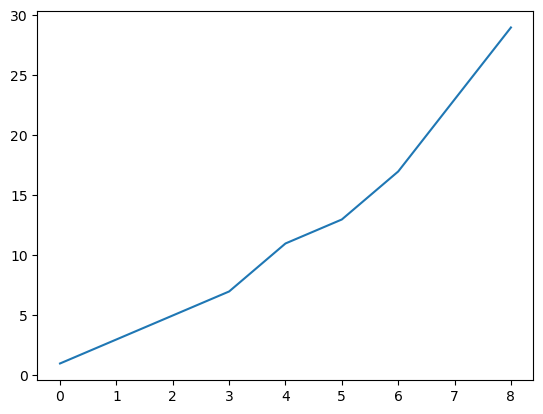

In [210]:
nums = (1,3,5,7,11,13,17,23,29)

plt.plot(nums)
plt.show()